In [26]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import PIL
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import landscape


In [27]:
exit_black_array = []
exit_white_array = []
White = []
Black = []

def output(array):
    
    img = cv2.imread('./samples/Board.png')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    outside_center_coordinates = (750,750) #44
    radius =25
    thinkness = -1
    total_blackNum = 0
    total_whiteNum = 0
    frame = 30
    board_ratio = 56

    fontFace = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 1.5
    number_thinkness = 3
    white_sequence_number = 2
    black_sequence_number = 1

    my_dict = {}



    center_coordinate = (548, 548)
    left_top_coordinate = (44, 45)
    Black_board_coordinate = []
    White_board_coordinate = []
    lineType = cv2.LINE_AA

    temp = "False"
    for i in range(len(array)): #create dic to store value
        for j in range(len(array[i])):
        
            my_dict[(i, j)] = array[i][j]

    for key, value in my_dict.items(): #checking 0 / 1 / 2
        if (value == 1):
            #print("value == 1")
            if key not in exit_black_array:
                Black.append(key)
                exit_black_array.append(key)
            #print("added")
            #print("exit: ", exit_black_array)


        elif value == 2:
            if key not in exit_black_array:
                White.append(key)
                exit_black_array.append(key)
            #print("added")
            #print("exit: ", exit_black_array)

    for item in Black:
        if item not in exit_white_array:
            exit_white_array.append(item)

    print("Black -sorted", Black)
    print("Black_array: ", Black) # return the location of black peices
    print("White_array: ", White) # return the location of white peices

#==========================================================================
    #changing the location into actual board coordinate
    for i in range(len(Black)):
        Black_board_coordinate.append((int(44+board_ratio * Black[i][1]) , int(44+board_ratio * Black[i][0])))
        print("board coordinate: ", Black_board_coordinate)
        #img = cv2.circle(img, Black_board_coordinate, radius, (0, 0, 0), thinkness)
        total_blackNum += 1

    for i in range(len(White)):
        White_board_coordinate.append((int(44+board_ratio * White[i][1]) , int(44+board_ratio * White[i][0])))
        #img = cv2.circle(img, White_board_coordinate, radius, (255, 255, 255), thinkness)
        total_whiteNum += 1

    print("黑棋總數量: ", total_blackNum)
    print("白棋總數量: ", total_whiteNum)

#===========================================================================

#========== Draw ===============
    for i in range(len(Black_board_coordinate)): #draw black

        #print(Black_board_coordinate[i][0])
        img = cv2.circle(img, (Black_board_coordinate[i][0], Black_board_coordinate[i][1]), radius, (0, 0, 0), thinkness) #center
        
    for i in range(len(White_board_coordinate)): #draw white

        img = cv2.circle(img, (White_board_coordinate[i][0], White_board_coordinate[i][1]), radius, (250, 250, 250), thinkness) #center
        img = cv2.circle(img, White_board_coordinate[i], radius, (0, 0, 0), 2)

    for i in range(len(Black_board_coordinate)): #black number
        coordinate = (Black_board_coordinate[i][0]-14 , Black_board_coordinate[i][1] + 15),
        fontScale = 1.4
        if black_sequence_number >= 10:
            fontScale = 1.1
            coordinate = (Black_board_coordinate[i][0]-24 , Black_board_coordinate[i][1] + 12),
        img = cv2.putText(img, str(black_sequence_number), coordinate[0], fontFace, fontScale, (250,250,250), number_thinkness, lineType)
        black_sequence_number += 2

    for i in range(len(White_board_coordinate)): #white number
        coordinate = (White_board_coordinate[i][0]-14 , White_board_coordinate[i][1] + 15),
        fontScale = 1.4
        if white_sequence_number >= 10:
            fontScale = 1.1
            coordinate = (White_board_coordinate[i][0]-24 , White_board_coordinate[i][1] + 12),
        img = cv2.putText(img, str(white_sequence_number), coordinate[0], fontFace, fontScale, (0,0,0), number_thinkness, lineType)
        white_sequence_number += 2
#=================================

    cv2.imwrite('output.png', img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    plt.imshow(img)
    plt.show()  

    return img



    

Black -sorted [(3, 3)]
Black_array:  [(3, 3)]
White_array:  [(2, 5)]
board coordinate:  [(212, 212)]
黑棋總數量:  1
白棋總數量:  1


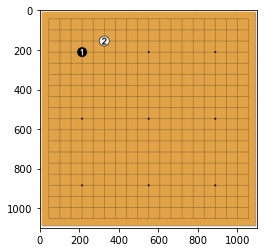

Black -sorted [(3, 3), (2, 2)]
Black_array:  [(3, 3), (2, 2)]
White_array:  [(2, 5), (5, 2)]
board coordinate:  [(212, 212)]
board coordinate:  [(212, 212), (156, 156)]
黑棋總數量:  2
白棋總數量:  2


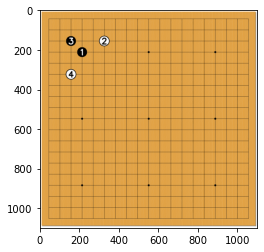

Black -sorted [(3, 3), (2, 2), (1, 1)]
Black_array:  [(3, 3), (2, 2), (1, 1)]
White_array:  [(2, 5), (5, 2)]
board coordinate:  [(212, 212)]
board coordinate:  [(212, 212), (156, 156)]
board coordinate:  [(212, 212), (156, 156), (100, 100)]
黑棋總數量:  3
白棋總數量:  2


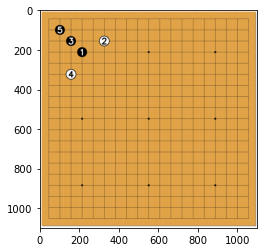

Black -sorted [(3, 3), (2, 2), (1, 1)]
Black_array:  [(3, 3), (2, 2), (1, 1)]
White_array:  [(2, 5), (5, 2), (2, 8)]
board coordinate:  [(212, 212)]
board coordinate:  [(212, 212), (156, 156)]
board coordinate:  [(212, 212), (156, 156), (100, 100)]
黑棋總數量:  3
白棋總數量:  3


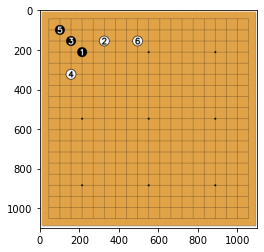

Black -sorted [(3, 3), (2, 2), (1, 1), (2, 3), (15, 13), (15, 14)]
Black_array:  [(3, 3), (2, 2), (1, 1), (2, 3), (15, 13), (15, 14)]
White_array:  [(2, 5), (5, 2), (2, 8), (1, 2), (1, 3), (2, 1), (2, 4), (3, 2), (3, 4), (4, 3), (14, 13), (14, 14), (15, 12), (15, 15), (16, 13), (16, 14)]
board coordinate:  [(212, 212)]
board coordinate:  [(212, 212), (156, 156)]
board coordinate:  [(212, 212), (156, 156), (100, 100)]
board coordinate:  [(212, 212), (156, 156), (100, 100), (212, 156)]
board coordinate:  [(212, 212), (156, 156), (100, 100), (212, 156), (772, 884)]
board coordinate:  [(212, 212), (156, 156), (100, 100), (212, 156), (772, 884), (828, 884)]
黑棋總數量:  6
白棋總數量:  16


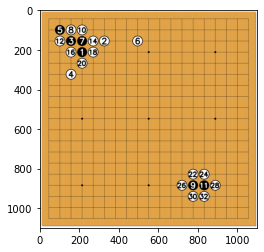

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [28]:


array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]


output(array)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]


output(array)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]


output(array)


array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,1,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]


output(array)

array = [
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,2,1,1,2,2,0,0,2,0,0,0,0,0,0,0,0,0,0],
        [0,0,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]


output(array)




In [32]:

def genpdf(filename,pagesizes):
    pdf = canvas.Canvas(filename)
    pdf.setPageSize(pagesizes)
    return pdf

def save_img_to_pdf(pdf,image,x,y,w,h):
    pdf.drawImage(image,x,y,w,h)
    pdf.showPage()

In [34]:
if __name__ == '__main__':    
    pdf_size = (2480,3508)
    my_pdf = genpdf('my_pdf.pdf',pdf_size)
    folder = 'output'
    filelist = os.listdir(folder)
    for filename in filelist:
        img = PIL.Image.open(folder+'/'+filename)
        img_w,img_h = img.size
        img_x = (landscape(pdf_size)[1]-img_w)/2
        img_y = (landscape(pdf_size)[0]-img_h)/2
        save_img_to_pdf(my_pdf,folder+'/'+filename,x=img_x,y=img_y,w=img_w,h=img_h)
        print('image'+str(filename)+'saved.')
    my_pdf.save()

imageoutput.pngsaved.
